In [1]:
url = 'https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and'

In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Only using data from one large shelter so that adoption policies and strategies are the same 
austin_raw_data = pd.read_csv('raw_data/aac_intakes_outcomes.csv')

# 1. Selecting columns and dogs as animal type

In [4]:
austin_raw_data.columns


Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [5]:
#how many are included?
austin_raw_data['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [6]:
#only select dogs
austin_data = austin_raw_data[austin_raw_data['animal_type'] == 'Dog']
austin_data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [7]:
#drop redundant, irrelevant or columns missing many values 
new_columns = ['outcome_type', 'animal_id_intake',
        'age_upon_outcome_(years)',
       'outcome_datetime',
       'outcome_monthyear', 
       'age_upon_intake',  'animal_type', 'breed', 'color',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'sex_upon_outcome',
       'age_upon_intake_(years)',
        'intake_datetime', 
        'intake_monthyear', 
       'intake_number', 'time_in_shelter_days'] 

In [8]:

austin_data = austin_data.loc[:, new_columns]
austin_data.head()


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,Neutered Male,10.0,2017-12-07 00:00:00,2017-12,1.0,0.588194
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,Neutered Male,7.0,2014-12-19 10:21:00,2014-12,2.0,1.259722
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,Neutered Male,6.0,2014-03-07 14:26:00,2014-03,3.0,1.113889
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,Neutered Male,10.0,2014-04-02 15:55:00,2014-04,1.0,4.970139
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,Neutered Male,16.0,2013-11-16 09:02:00,2013-11,1.0,0.119444


In [9]:
austin_data.shape

(45366, 18)

# 2. Viewing and changing data types

In [10]:
austin_data.dtypes

outcome_type                 object
animal_id_intake             object
age_upon_outcome_(years)    float64
outcome_datetime             object
outcome_monthyear            object
age_upon_intake              object
animal_type                  object
breed                        object
color                        object
intake_condition             object
intake_type                  object
sex_upon_intake              object
sex_upon_outcome             object
age_upon_intake_(years)     float64
intake_datetime              object
intake_monthyear             object
intake_number               float64
time_in_shelter_days        float64
dtype: object

In [11]:
#convert intake and outcome dates to datetime objects 
#time of year may play into number of adoptions
austin_data[['outcome_datetime', 'intake_datetime']] = austin_data[['outcome_datetime', 'intake_datetime']].apply(pd.to_datetime, format = '%Y/%m/%d', errors = 'coerce')
austin_data.dtypes

outcome_type                        object
animal_id_intake                    object
age_upon_outcome_(years)           float64
outcome_datetime            datetime64[ns]
outcome_monthyear                   object
age_upon_intake                     object
animal_type                         object
breed                               object
color                               object
intake_condition                    object
intake_type                         object
sex_upon_intake                     object
sex_upon_outcome                    object
age_upon_intake_(years)            float64
intake_datetime             datetime64[ns]
intake_monthyear                    object
intake_number                      float64
time_in_shelter_days               float64
dtype: object

# 3. Exploring 

In [12]:
austin_data['outcome_type'].unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan], dtype=object)

In [13]:
austin_data.outcome_type.loc[austin_data['outcome_type']== 'Return to Owner'].count()

13273

In [14]:
#a lot of unique breeds, maybe color will be a better way to group 
#How accurate is the breed? we cannot not know for sure what the dogs are, maybe this isn't as help as I thought

austin_data['breed'].nunique()

1919

In [15]:
#the majority are followed by 'mix' 
austin_data.groupby('breed')['animal_id_intake'].nunique()[40:60]

breed
American Bulldog/Boxer                    4
American Bulldog/Chinese Sharpei          1
American Bulldog/Dalmatian                1
American Bulldog/English Bulldog          1
American Bulldog/Great Pyrenees           1
American Bulldog/Labrador Retriever       3
American Bulldog/Mastiff                  3
American Bulldog/Pit Bull                13
American Bulldog/Pointer                  2
American Eskimo                           7
American Eskimo Mix                      20
American Eskimo/Alaskan Husky             1
American Eskimo/Australian Shepherd       1
American Eskimo/Border Collie             2
American Foxhound                         1
American Foxhound Mix                    11
American Foxhound/Labrador Retriever      1
American Foxhound/Pointer                 1
American Pit Bull Terrier                 8
American Pit Bull Terrier Mix           135
Name: animal_id_intake, dtype: int64

In [63]:
#Color needs to be grouped to reduced amount of unique values
austin_data.groupby('color')['animal_id_intake'].nunique().sort_values(ascending=False).head(60)

color
Black/White            4398
Black                  2208
White                  2074
Tan/White              2073
Brown/White            2064
Tan                    1759
Tricolor               1718
Brown                  1631
Black/Tan              1588
White/Black            1328
White/Brown            1286
Black/Brown            1274
Brown Brindle/White    1103
Blue/White             1050
White/Tan               995
Brown/Black             912
Red                     794
Red/White               731
Brown Brindle           636
Tan/Black               533
Chocolate/White         497
Yellow                  435
Sable                   380
Cream                   362
Buff                    343
Chocolate               328
White/Brown Brindle     250
Fawn/White              245
Blue                    220
Brown/Tan               207
Sable/White             195
Gray/White              191
Blue Merle              178
Fawn                    158
Black Brindle/White     156
Gray          

In [17]:
austin_data['time_in_shelter_days'].sort_values(ascending =False).head(20)
austin_data['time_in_shelter_days'].median()

5.064583333333333

# 4. Null values

In [18]:
#finding null values
austin_data.columns[austin_data.isna().any()]

Index(['outcome_type', 'sex_upon_intake', 'sex_upon_outcome'], dtype='object')

In [19]:
#dropping these becasue without the outcome the dog information is not much use 
austin_data[austin_data['outcome_type'].isna()]

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days
44097,NaN,A718046,10.000000,2016-03-26 14:22:00,2016-03,10 years,Dog,Chihuahua Longhair Mix,Cream,Normal,Public Assist,Neutered Male,Neutered Male,10.000000,2016-03-26 00:00:00,2016-03,1.0,0.598611
59034,NaN,A737930,0.821918,2016-11-17 10:59:00,2016-11,10 months,Dog,Pit Bull Mix,Fawn/White,Normal,Public Assist,Intact Male,Intact Male,0.821918,2016-11-09 15:01:00,2016-11,2.0,7.831944


In [20]:
#dropping this beacuse its only one and is an owner surrender and then returned to owner
austin_data[austin_data['sex_upon_outcome'].isna()]

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days
6523,Return to Owner,A667395,7.0,2013-11-27 16:11:00,2013-11,7 years,Dog,Dachshund,Brown Merle,Normal,Owner Surrender,NaN,NaN,7.0,2013-11-17 13:15:00,2013-11,1.0,10.122222


In [21]:
#new dataframe with dropped columns and no null values
df = austin_data[austin_data[['outcome_type', 'sex_upon_outcome', 'sex_upon_intake']].notnull().all(1)]
df.head()

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,Neutered Male,10.0,2017-12-07 00:00:00,2017-12,1.0,0.588194
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,Neutered Male,7.0,2014-12-19 10:21:00,2014-12,2.0,1.259722
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,Neutered Male,6.0,2014-03-07 14:26:00,2014-03,3.0,1.113889
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,Neutered Male,10.0,2014-04-02 15:55:00,2014-04,1.0,4.970139
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,Neutered Male,16.0,2013-11-16 09:02:00,2013-11,1.0,0.119444


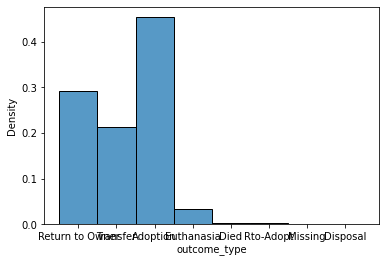

<Figure size 576x288 with 0 Axes>

In [57]:
_ = sns.histplot( x=  df['outcome_type'], stat = 'density')
plt.figure(figsize=(8, 4))
plt.show()
#what to do about transfered animals? Do they count as unadopted since it's a no kill shelter? 

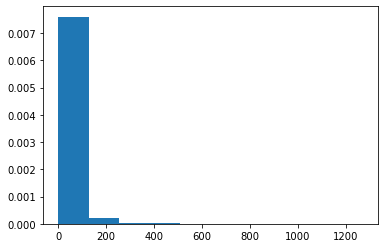

In [52]:
data = df[df['outcome_type'] == 'Adoption'] ['time_in_shelter_days']
plt.hist(data,density =True )
plt.show()

In [ ]:
df.to_csv('wrangled_data')